<b>Iris data histogram</b>

The data set was collected by botanist Edward Anderson and made famous by statistician Ronald Fisher. Using samples of Iris setosa, Iris versicolor, and Iris virginica, Anderson measured the anatomical properties. A full set of data is included in [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Petal length measurements will be used here

In [63]:
# Import plotting modules
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd

In [4]:
# Set default Seaborn style
sns.set()

In [10]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris
iris

<function sklearn.datasets._base.load_iris(*, return_X_y=False, as_frame=False)>

Using Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings <br>

I have already imported iris data as "iris.csv" file

In [15]:
iris_csv=pd.read_csv("iris.csv")
iris_csv.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
versicolor=iris_csv.loc[iris_csv["type"]=="Iris-versicolor"]
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,type
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [20]:
versicolor_petal_length=versicolor["petal_length"]
versicolor_petal_length.sample(5)

66    4.5
93    3.3
79    3.5
87    4.4
56    4.7
Name: petal_length, dtype: float64

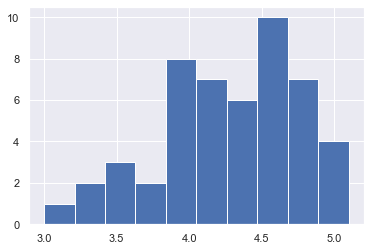

In [21]:
#versicolor_petal_length.sample(5)
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

<b>Axis labels<br> <br>

In above plot we didn't use any lable, now lets put axis labels

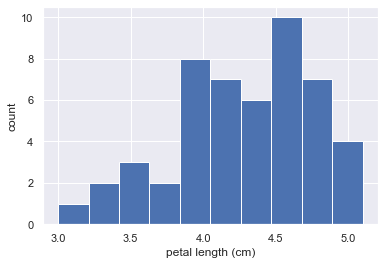

In [22]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_=plt.xlabel("petal length (cm)")
_=plt.ylabel("count")


# Show histogram
plt.show()

<b>Histograms can be adjusted by adjusting the number of bins within them<b> <br>

Ten bins were used in the histogram. Matplotlib uses this by default. Square root rule: choose the number of bins equal to the square root of the number of samples. Iris versicolor petal lengths are plotted again using the square root rule. Using the bins keyword argument, we specify how many bins to use in plt.hist().

The plotting utilities are already imported and the seaborn defaults already set.

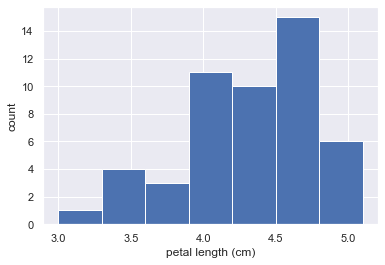

In [23]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data=len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins=np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins=int(n_bins)

# Plot the histogram
_=plt.hist(versicolor_petal_length,bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

<b>Bee swarm plot<b><br>

Make a bee swarm plot of the iris petal lengths. Our x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in has been loaded as df.

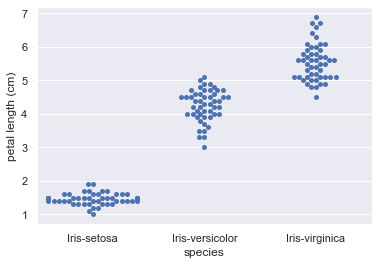

In [64]:
df=iris_csv

# Create bee swarm plot with Seaborn's default settings
_=sns.swarmplot(x='type',y='petal_length',data=df)

# Label the axes
_=plt.xlabel("species")
_=plt.ylabel("petal length (cm)")

# Show the plot
plt.show()



<b>Computing the ECDF<b><br>

Here we will draw empirical Cumulative Distribution Function ECDF by writing a function call ecdf

In [26]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

<b>Plotting the ECDF<b><br>

We will now use our above defined ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. We will then plot the ECDF. As ecdf() function returns two arrays so we will need to unpack them. An example of such unpacking is x, y = ecdf(data)

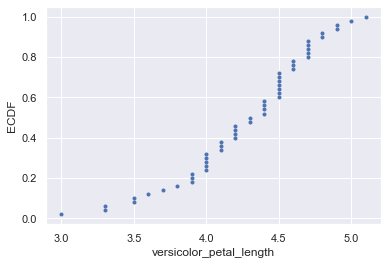

In [27]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_=plt.plot(x_vers,y_vers,marker=".",linestyle='none')

# Label the axes
_=plt.xlabel("versicolor_petal_length")
_=plt.ylabel("ECDF")


# Display the plot
plt.show()

<b>Comparison of ECDFs<b><br>

ECDFs also allow us to compare two or more distributions (though plots get cluttered if we have too many). Here, we will plot ECDFs for the petal lengths of all three iris species. We already wrote a function to generate ECDFs so we can put it to good use! To overlay all three ECDFs on the same plot, we can use plt.plot() three times, once for each ECDF

In [28]:
setosa=iris_csv.loc[iris_csv["type"]=="Iris-setosa"]
setosa_petal_length=setosa["petal_length"]
virginica=iris_csv.loc[iris_csv["type"]=="Iris-virginica"]
virginica_petal_length=virginica["petal_length"]

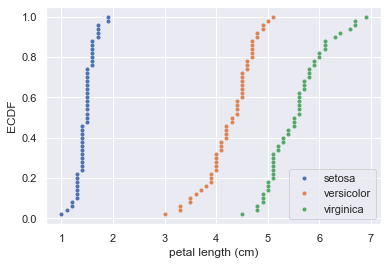

In [29]:
# Compute ECDFs
x_set, y_set=ecdf(setosa_petal_length)
x_vers, y_vers=ecdf(versicolor_petal_length)
x_virg, y_virg=ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_=plt.plot(x_set,y_set,marker='.',linestyle='none')
_=plt.plot(x_vers,y_vers,marker='.',linestyle='none')
_=plt.plot(x_virg,y_virg,marker='.',linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica

<b>Computing means<br>

The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean()

In [30]:
# Compute the mean: mean_length_vers
mean_length_vers=np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


<b>Computing percentiles<b><br>

In this exercise, we will compute the percentiles of petal length of Iris versicolor.

In [31]:
# Specify array of percentiles: percentiles
percentiles =np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers=np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


<b>Comparing percentiles to ECDF<b><br>

To see how the percentiles relate to the ECDF, we will plot the percentiles of Iris versicolor petal lengths we calculated in the last exercise on the ECDF plot. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles. Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, we will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

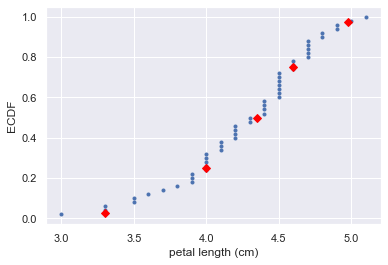

In [32]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle="none")

# Show the plot
plt.show()

<b>Box-and-whisker plot<b><br>

Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths

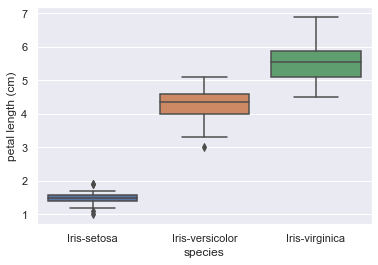

In [34]:
# Create box plot with Seaborn's default settings
_=sns.boxplot(x='type',y='petal_length',data=df)

# Label the axes
_=plt.xlabel("species")
_=plt.ylabel("petal length (cm)")


# Show the plot
plt.show()

<b>Computing the variance<b><br>

It is important to have some understanding of what commonly-used functions are doing under the hood. Though we may already know how to compute variances, however we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use np.var() to compute it.

![variance and standard deviation](variance.png "variance and standard deviation")



In [35]:
# Array of differences to mean: differences
differences=versicolor_petal_length-np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq=differences**2

# Compute the mean square difference: variance_explicit
variance_explicit=np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np=np.var(versicolor_petal_length)

# Print the results
print(variance_explicit,variance_np)

0.21640000000000004 0.21640000000000004


<b>The standard deviation and the variance<b><br>

The standard deviation is the square root of the variance. We will see this by computing the standard deviation using np.std() and comparing it to what we get by computing the variance with np.var() and then computing the square root.

In [36]:
# Compute the variance: variance
variance=np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


<b>Scatter plots<b><br>

When we made bee swarm plots, box plots, and ECDF plots in previous exercises, we compared the petal lengths of different species of iris. But what if we want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson’s Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

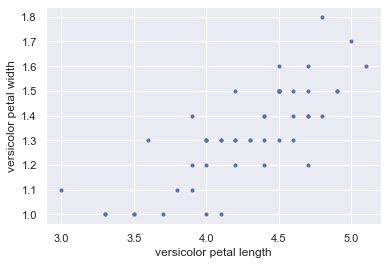

In [37]:
versicolor_petal_width=versicolor["petal_width"]
# Make a scatter plot
_=plt.plot(versicolor_petal_length,versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
_ = plt.xlabel('versicolor petal length')
_ = plt.ylabel('versicolor petal width')


# Show the result
plt.show()

Indeed, we see some correlation. Longer petals also tend to be wider.

<b>Computing the covariance<b><br>

The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance

![covariance](covariance.png "covariance")

In [38]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix=np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov=covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


<b>Computing the Pearson correlation coefficient<b> <br>

The Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1]. We will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. We will then use this function to compute it for the petal lengths and widths of I. versicolor.

In [39]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


Generating random numbers using the np.random module

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

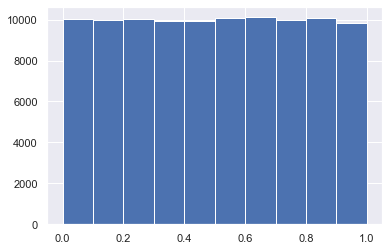

In [40]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

Above histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram

**The np.random module and Bernoulli trials**

Bernoulli trials can be compared to flipping a coin with a bias. Each coin flip has a probability p of landing heads (success) and 1−p of landing tails (failure). Perform_bernoulli_trials(n, p) returns the number of successes out of n Bernoulli trials, each of which has a probability p of success. Each Bernoulli trial is performed using np.random.random(), which returns a random number between 0 and 1.

In [41]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+=1

    return n_success

**How many defaults might we expect?**

Suppose a bank made 100 mortgage loans. There is a possibility that anywhere between 0 and 100 of the loans will default. Given that the probability of a default is p = 0.05, we would like to know the probability of getting a given number of defaults. We will conduct a simulation to investigate this. Using the perform_bernoulli_trials() function you created in the previous exercise, you will perform 100 Bernoulli trials and record how many defaults occur. A success in this case is a default. Remember that success indicates that the Bernoulli trial was True, i.e., did the loan recipient default? This will be repeated for another 100 Bernoulli trials. Let's repeat it 1000 times until we get it right. In the next step, we will plot a histogram indicating the probability of default.

AttributeError: 'Rectangle' object has no property 'normed'

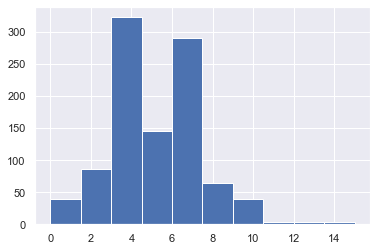

In [42]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(n=100,p=0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

**Will the bank fail?**

We will use the ecdf() function we wrote earlier to plot the number of defaults we got from the previous exercise. What is the probability that the bank will lose money if 10 or more of its loans default?

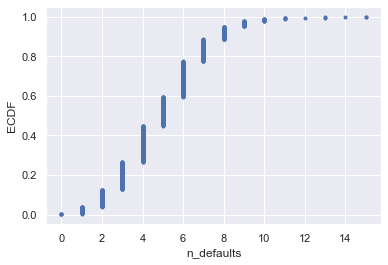

Probability of losing money = 0.022


In [44]:
# Compute ECDF: x, y
x,y=ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y,marker=".", linestyle='none')
plt.xlabel('n_defaults')
plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money=np.sum(n_defaults >=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

s we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

**Sampling out of the Binomial distribution**

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation we did earlier using our custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that we are plotting is that of the Binomial distribution.


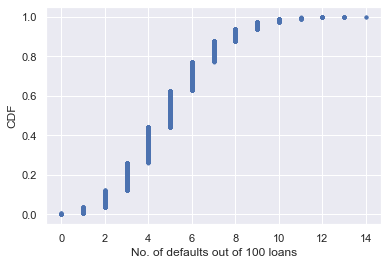

In [45]:
np.random.seed(42)
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults=np.random.binomial(n=100,p=0.05,size=10000)

# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker=".",linestyle='none')
plt.xlabel('No. of defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()

**Plotting the Binomial PMF**



AttributeError: 'Rectangle' object has no property 'normed'

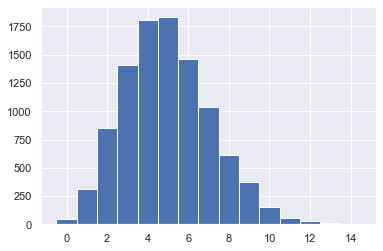

In [46]:
# Compute bin edges: bins
bins = np.arange(0,max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults,density=True,bins=bins)

# Label axes
plt.xlabel('#of success')
plt.ylabel('PMF')


# Show the plot
plt.show()

**Relationship between Binomial and Poisson distributions**

Poisson distributions are limits of Binomial distributions for rare events, we were told. In light of the stories, this makes sense. For an hour, let's do Bernoulli trials every minute, with a 0.1 success rate. In 60 trials, we would expect about six successes, and the success rate is binomially distributed. On average, we get 6 hits on a website per hour, just like the Poisson story. With n Bernoulli trials, the Poisson distribution approximates a Binomial distribution (with n large and p small) with probability p. Because it has just one parameter instead of two, the Poisson distribution is often simpler to work with. Let's explore both distributions computationally. A Poisson distribution with an arrival rate of 10 will be used to compute mean and standard deviation. Next, we will calculate mean and standard deviation from a Binomial distribution with parameters n and p.

In [47]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9732 3.1276319732347027
n = 20 Binom: 9.9999 2.243858282066851
n = 100 Binom: 9.9957 2.998346462635698
n = 1000 Binom: 9.997 3.124162447761


For above The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

**Anomalies in 2015?**

Baseball's 1990 and 2015 seasons both had seven no-hitters. Considering that there are on average 251/115 no-hitters per season, what is the probability of having seven or more?

In [48]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115,size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large=n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0067


Above proof that The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

**A normal PDF**

This exercise introduces the Normal PDF and shows how hacker statistics can be used to plot a PDF of a known distribution. To plot a Normal PDF, we will vary the variance.

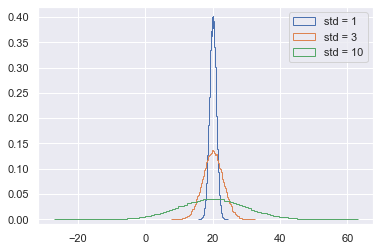

In [52]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)

# Make histograms
_=plt.hist(samples_std1,density=True,histtype='step',bins=100)
_=plt.hist(samples_std3,density=True,histtype='step',bins=100)
_=plt.hist(samples_std10,density=True,histtype='step',bins=100)


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


We can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

**The Normal CDF**

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation

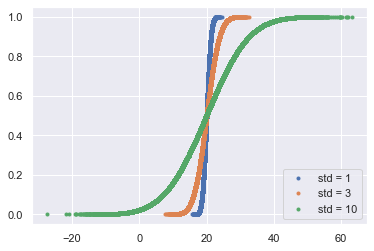

In [53]:
# Generate CDFs
x_std1, y_std1=ecdf(samples_std1)
x_std3, y_std3=ecdf(samples_std3)
x_std10, y_std10=ecdf(samples_std10)

# Plot CDFs
_=plt.plot(x_std1,y_std1,marker='.',linestyle='none')
_=plt.plot(x_std3,y_std3,marker='.',linestyle='none')
_=plt.plot(x_std10,y_std10,marker='.',linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

**Does the Belmont Stakes have a normal distribution?**

The Belmont Stakes is a 1.5-mile race for 3-year-old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. It was the fastest year, but 1970 was the slowest because of unusually wet weather. Remove these two outliers from the data set and calculate Belmont winners' means and standard deviations. Create a CDF using the np.random.normal() function and sample from the Normal distribution. ECDF overlay from winning Belmont times. Do they look normal?

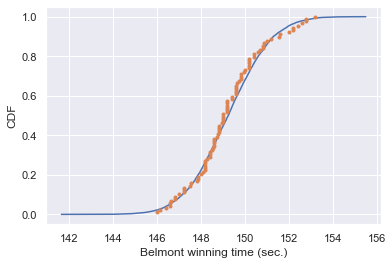

In [55]:
# Compute mean and standard deviation: mu, sigma
belmont_no_outliers=np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

mu=np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor,y_theor=ecdf(samples)
x,y=ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the above data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

**Does a horse have a chance of matching or beating Secretariat's record?**

How likely is it that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat if the speeds of the Belmont winners are normally distributed?

In [56]:
# Take a million samples out of the Normal distribution: samples
samples=np.random.normal(mu,sigma,size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob=np.sum(samples<=144)/1000000

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000647


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

In [57]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)
    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

**A cycle and no-hitter distribution**

Using your sampling function, we'll calculate the waiting time to observe a no-hitter and the cycle hitting. Typical waiting times for no-hitters and cycle hits are 764 and 715 games, respectively.

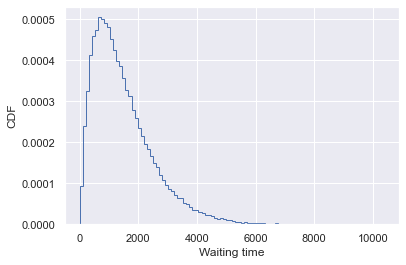

In [59]:
# Draw samples of waiting times: waiting_times
waiting_times=successive_poisson(764,715,size=100000)

# Make the histogram
_=plt.hist(waiting_times,bins=100,density=True,histtype='step')


# Label axes
plt.xlabel('Waiting time')
plt.ylabel('CDF')


# Show the plot
plt.show()